In [1]:
library(monocle3)
library(ggplot2)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie

In [2]:
cds <- readRDS('output/monocle3-metza-welch.rds')



ERROR: Error in library(MatrixMM): there is no package called 'MatrixMM'


In [8]:
q = plot_cells(cds, color_cells_by = 'dataset',show_trajectory_graph = F,group_label_size = 2, label_cell_groups = F, alpha = 1)

ggsave(paste0('plots-submit/welch-dataset.png'), q, dpi=600, width = 6, height = 5)

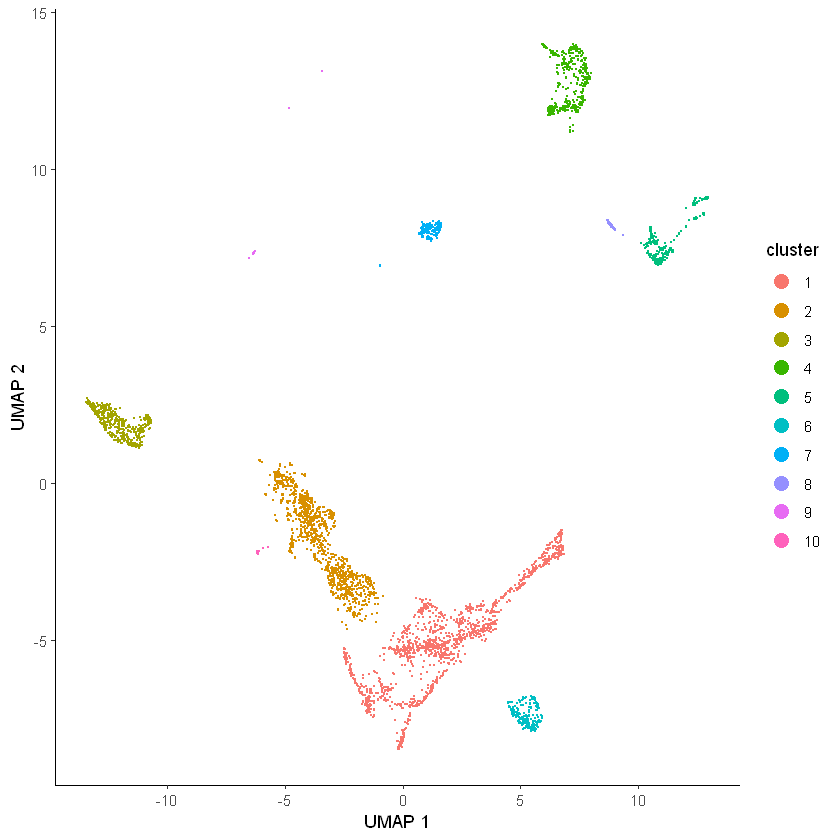

In [9]:
q = plot_cells(cds ,show_trajectory_graph = F,group_label_size = 2, label_cell_groups = F, alpha = 1)

ggsave(paste0('plots-submit/welch-clusters.png'), q, dpi=600, width = 6, height = 5)

q

In [26]:
#plot_cells(cds, show_trajectory_graph = F)



#write.csv(as.data.frame(colData(cds)),'welch-overlap-metadata.csv')

colData(cds)$monocle3_clusters = clusters(cds)
colData(cds)$UMAP1 = reducedDims(cds)$UMAP[,1]
colData(cds)$UMAP2 = reducedDims(cds)$UMAP[,2]


library(Matrix)

writeMM(counts(cds), 'welch-merged.mtx')
write.csv(colData(cds), 'welch-merged_cell-metadata.csv')
write.csv(rowData(cds), 'welch-merged_gene-metadata.csv')

NULL

In [21]:
write.csv(as.data.frame(colData(cds)),'welch-overlap-metadata.csv')

In [6]:
q = plot_cells(cds, color_cells_by = 'partition', show_trajectory_graph = F, group_label_size = 1, label_cell_groups = T, alpha = 1)

ggsave(paste0('plots-submit/saunders-partition.png'), q, dpi=600, width = 5, height = 5)

In [7]:
focused.cds = cds[,(partitions(cds) == '1') | (colData(cds)$region == 'SN')]
focused.cds = preprocess_cds(focused.cds, num_dim = 25)
focused.cds = align_cds(focused.cds,alignment_group = 'dataset')
focused.cds = reduce_dimension(focused.cds)
focused.cds = cluster_cells(focused.cds, reduction_method = 'UMAP',k = 20)
focused.cds = learn_graph(focused.cds)

Aligning cells from different batches using Batchelor. 
Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091

Warning message in (function (jobs, data, centers, info, distance, k, query, get.index, :
"tied distances detected in nearest-neighbor calculation"
No preprocess_method specified, and aligned coordinates have been computed previously. Using preprocess_method = 'Aligned'



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [8]:
q = plot_cells(focused.cds , color_cells_by = 'region',show_trajectory_graph = F,group_label_size = 2, label_cell_groups = F, alpha = 1)

ggsave(paste0('plots-submit/focused-saunders-region.png'), q, dpi=600, width = 6, height = 5)


In [9]:
q = plot_cells(focused.cds , color_cells_by = 'dataset',show_trajectory_graph = F,group_label_size = 2, label_cell_groups = F, alpha = 1)

ggsave(paste0('plots-submit/focused-saunders-dataset.png'), q, dpi=600, width = 6, height = 5)

In [10]:
library(liger)
analyze.liger <- function(cds, object.name, correct, fields)
{
    objects = list()
    fields.values = unique(colData(cds)[[correct]])
    
    for( f in fields.values){
        print(f)
        objects[[f]] = as.matrix(counts(cds[,(colData(cds)[[correct]] == f)]))
    }
    
    ligerex = createLiger(objects) #Can also pass in more than 2 datasets
    ligerex = normalize(ligerex)
    ligerex = selectGenes(ligerex, var.thresh = 0.1)
    ligerex = scaleNotCenter(ligerex)
    ligerex = optimizeALS(ligerex, k = 20) 
    ligerex = quantileAlignSNF(ligerex)
    ligerex = runUMAP(ligerex)
    saveRDS(ligerex, paste0('./output/ligerex-',object.name,'.rds'))
     for(f in fields){
        ligerex@cell.data[[f]] = as.factor(colData(cds)[f][rownames(ligerex@cell.data),])
        q = plotFeature(ligerex, f, by.dataset = F, discrete = T,return.plots = T)
        ggsave(plot = q, width = 4, height = 4, dpi = 300, filename = paste0('./plots/liger-', object.name, '-',f,'.png'))
    }   
    ligerex
}


#liger.obj = readRDS(paste0('./output/ligerex-','focused-saunders-metzakopian','.rds'))






Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.2"

Attaching package: 'Matrix'


The following object is masked from 'package:S4Vectors':

    expand


Loading required package: patchwork


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots



Attaching package: 'liger'


The following object is masked from 'package:BiocGenerics':

    normalize




In [11]:
q = plot_cells(focused.cds , show_trajectory_graph = F,group_label_size = 2, label_cell_groups = T, alpha = 1)

ggsave(paste0('plots-submit/focused-saunders-clusters.png'), q, dpi=600, width = 6, height = 5)

In [12]:
selection = c('1')
meta.cells = colData(focused.cds)[clusters(focused.cds) %in% selection,]

table(meta.cells$Cell.Type)



  CB_3   CB_4   DAn1   DAn3   DAn4  ENT_4   FC_1  FC_11   FC_2   GP_2   GP_3 
     7     53    212      2      9     44      1      2      5    634      1 
  PC_4   SN_3   SN_4 STR_13 STR_14   TH_2   TH_3 
     1   1545      2     13     98      8    871 

In [15]:
cds.orig = cds
cds  = focused.cds

In [16]:
dan1.clusters = c('1')
#dan4.clusters = c('60','25')
colData(cds)$clusters= clusters(cds)

colData(cds)$overlap = 'none'
#colData(cds)$overlap[colData(cds)$clusters %in% dan4.clusters] = 'DAn4_overlap'
colData(cds)$overlap[colData(cds)$clusters %in% dan1.clusters] = 'DAn1_overlap'

In [17]:


q = plot_cells(cds , color_cells_by = 'overlap', show_trajectory_graph = F,group_label_size = 2, label_cell_groups = T, alpha = 1)
ggsave(paste0('plots-submit/focused-saunders-overlap.png'), q, dpi=600, width = 6, height = 5)

In [18]:


q = plot_cells(cds , color_cells_by = 'Cell.Type', show_trajectory_graph = F,group_label_size = 2, label_cell_groups = F, alpha = 1)
ggsave(paste0('plots-submit/focused-saunders-celltype.png'), q,  dpi=600, width = 6, height = 5)

In [19]:

cluster.selection = cds[,clusters(cds) %in% dan1.clusters]
colData(cluster.selection)$type = 'in-vitro'
colData(cluster.selection)$type = with(colData(cluster.selection), paste0(region,'_',subcluster))

histo.table = table(colData(cluster.selection)$Cell.Type) 

ct.to.consider.dan1 = names(histo.table)
ct.to.consider.dan1

[1] "CB_3"   "CB_4"   "DAn1"   "DAn3"   "DAn4"   "ENT_4"  "FC_1"   "FC_11" 
 [9] "FC_2"   "GP_2"   "GP_3"   "PC_4"   "SN_3"   "SN_4"   "STR_13" "STR_14"
[17] "TH_2"   "TH_3"

In [20]:
write.csv(as.data.frame(colData(cds)[(colData(cds)$overlap == 'DAn1_overlap') & (colData(cds)$dataset == 'metzakopian'),]), 'saunders-overlap.csv')

In [21]:
overlap.cds = cds[,colData(cds)$Cell.Type %in% c(ct.to.consider.dan1)]
ct.view = colData(overlap.cds)


#all.in.clusters= ct.view[ct.view,]
#as.data.frame(all)


In [22]:
ct.all  = ct.view[ct.view$Cell.Type %in% ct.to.consider.dan1,]
ct.select  = ct.all[ct.all$overlap =='DAn1_overlap',]
histo = as.data.frame(table(ct.all$Cell.Type ))
histo.select = as.data.frame(table(ct.select$Cell.Type ))
#histo = histo[histo$Freq > 0,] 

#colnames(histo) = c('overlap', 'celltype', 'cells')
#histo

histo.summary = merge(histo,histo.select, by ='Var1')
colnames(histo.summary) = c('region','total.cells', 'cells.in.overlap')

histo.summary$percent = as.numeric(with(histo.summary, cells.in.overlap / total.cells))

histo.summary[histo.summary$percent > 0.1,]


write.csv(histo.summary, './output/saunders-dan1-overlap.csv')

,region,total.cells,cells.in.overlap,percent
,<fct>,<int>,<int>,<dbl>
1,CB_3,11,7,0.6363636
2,CB_4,112,53,0.4732143
3,DAn1,1044,212,0.2030651
6,ENT_4,61,44,0.7213115
7,FC_1,1,1,1.0000000
9,FC_2,6,5,0.8333333
10,GP_2,2632,634,0.2408815
11,GP_3,7,1,0.1428571
12,PC_4,1,1,1.0000000
